## Preprocess model data: 

In [1]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [2]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

In [3]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [7]:
from bs_fdbck.constants import path_measurement_data
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [9]:
import datetime 

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in model data. 

In [11]:
model_lev_i=-1
select_station = 'ATTO'

In [12]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [13]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

#### Define dictionaries:

In [14]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### ECHAM SALSA:

In [15]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [16]:
case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

#### Variables

In [17]:
varl =[
    'apm',
    'geom',
    'airdens',
    'tempair',
    'uw',
    'vw',
    'ccn02',
    'ccn10',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'aot865nm',
    'ang550865',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'mmrtrN500',
    'mmrtrN250',
    'mmrtrN200',
    'mmrtrN100',
    'mmrtrN50',
    'mmrtrN3',
    'oh_con',
    'emi_monot_bio',
    'emi_isop_bio',
    'SO2_gas',
    'APIN_gas',
    'TBETAOCI_gas',
    'BPIN_gas',
    'LIMON_gas',
    'SABIN_gas',
    'MYRC_gas',
    'CARENE3_gas',
    'ISOP_gas',
    'VBS0_gas',
    'VBS1_gas',
    'VBS10_gas',
    'ORG_mass',
] 

#### Read in ECHAM-SALSA:

In [18]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'ECHAM-SALSA', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALS

In [19]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2023-03-08 17:15:52,774 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

{'model_name': 'ECHAM-SALSA', 'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [20]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

### EC-Earth

In [21]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [22]:
case_name = 'ECE3_output_Sara'
case_name_ec_earth = 'ECE3_output_Sara'
from_time = '2012-01'
to_time = '2019-02'
time_res = 'hour'
space_res='locations'
model_name='EC-Earth'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_ec_earth = [case_name]
di_mod2cases[model_name]=cases_ec_earth

#### Variables

In [23]:
varl =[
    'CCN0.20',
    'CCN1.00',
    'M_SO4NUS',
    'M_SOANUS',
    'M_BCAIS',
    'M_POMAIS',
    'M_SOAAIS',
    'M_SO4ACS',
    'M_BCACS',
    'M_POMACS',
    'M_SSACS',
    'M_DUACS',
    'M_SOAACS',
    'M_SO4COS',
    'M_BCCOS',
    'M_POMCOS',
    'M_SSCOS',
    'M_DUCOS',
    'M_SOACOS',
    'M_BCAII',
    'M_POMAII',
    'M_SOAAII',
    'M_DUACI',
    'M_DUCOI',
    'N_NUS',
    'N_AIS',
    'N_ACS',
    'N_COS',
    'N_AII',
    'N_ACI',
    'N_COI',
    'RWET_NUS',
    'RWET_AIS',
    'RWET_ACS',
    'RWET_COS',
    'RWET_AII',
    'RWET_ACI',
    'RWET_COI',
    'RDRY_NUS',
    'RDRY_AIS',
    'RDRY_ACS',
    'RDRY_COS',
    'od550aer',
    'od550oa',
    'od550soa',
    'od440aer',
    'od870aer',
    'od350aer',
    'loadsoa',
    'emiterp',
    'emiisop',
]
varl_ifs=[
    'var130',

]

#### Read in EC-Earth:

In [24]:
for case_name in cases_ec_earth:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'EC-Earth', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01

In [25]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import fix_timestamp_ec_earth

In [26]:
dic_ds = dict()
for ca in cases_ec_earth:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)


    ds_ifs = c.get_collocated_dataset(varl_ifs)


    ds = c.get_collocated_dataset(varl)
    ds = fix_timestamp_ec_earth(ds)
    ds_ifs = ds_ifs.rename({'lev':'lev_ifs'})


    ds = xr.merge([ds,ds_ifs])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.copy()

2023-03-08 17:15:56,883 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]


{'model_name': 'EC-Earth', 'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
2023-03-08 17:15:56,883 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]
['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc']


2023-03-08 17:15:57,032 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_POMAIS_ECE3_output_Sara_201

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_POMAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users

In [27]:
dic_mod_ca['EC-Earth'] = dic_ds.copy()

In [28]:
dic_mod_ca['EC-Earth']['ECE3_output_Sara']

<xarray.Dataset>
Dimensions:    (station: 7, time: 61369, lev: 34, lev_ifs: 91)
Coordinates:
  * station    (station) object 'ATTO' 'BIR' 'HTM' 'SGP' 'SMR' 'SMR4' 'VHL'
  * time       (time) datetime64[ns] 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 2012-01-01T00:30:00 ... NaT
  * lev        (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 30.0 31.0 32.0 33.0 34.0
  * lev_ifs    (lev_ifs) float64 1.0 2.0 3.0 4.0 5.0 ... 88.0 89.0 90.0 91.0
Data variables: (12/52)
    CCN0.20    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    CCN1.00    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCACS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCAII    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCAIS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCCOS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    ...         ...
    od440aer   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od550aer   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od550oa    (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od550soa   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od870aer   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    var130     (station, time, lev_ifs) float32 nan nan nan ... 278.7 278.8

### UKESM

In [29]:
case_name_ukesm = 'AEROCOMTRAJ'
case_name = case_name_ukesm
time_res = 'hour'
space_res = 'locations'
model_name = 'UKESM'

from_t = '2013-01-01'
to_t = '2019-01-01'

In [30]:
case_mod = case_name
cases_ukesm = [case_name]
di_mod2cases[model_name]=cases_ukesm

#### Variables

In [31]:
varl = [
    'Mass_Conc_OM_NS',

    'Mass_Conc_OM_KS',
    'Mass_Conc_OM_KI',
    'Mass_Conc_OM_AS',
    'Mass_Conc_OM_CS',
    'mmrtr_OM_NS',
    'mmrtr_OM_KS',
    'mmrtr_OM_KI',
    'mmrtr_OM_AS',
    'mmrtr_OM_CS',
    'nconcNS',
    'nconcKS',
    'nconcKI',
    'nconcAS',
    'nconcCS',
    'ddryNS',
    'ddryKS',
    'ddryKI',
    'ddryAS',
    'ddryCS',
    'Temp',
]

#### Read in UKESM:

In [32]:
for case_name in cases_ukesm:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                           # history_field=history_field
                           )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc exists
C

In [33]:
dic_ds = dict()
for ca in cases_ukesm:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                           )
    # history_field=history_field)




    ds = c.get_collocated_dataset(varl)


    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    ds = ds.rename({'model_level':'lev'})
    dic_ds[ca]=ds.copy()

2023-03-08 17:16:00,268 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr_OM_NS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc,

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2013-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr_OM_NS_AEROCOMTRAJ_2013-01-01_2019-0

In [34]:
dic_mod_ca['UKESM'] = dic_ds.copy()

In [35]:
_ds = dic_mod_ca['UKESM'][case_name_ukesm].sel(station='SMR')

In [36]:
_ds['hour'] = _ds['time.hour']
_ds

<xarray.Dataset>
Dimensions:          (time: 17776, lev: 85)
Coordinates:
  * time             (time) datetime64[ns] 2013-01-01 ... 2019-01-31T21:00:00
  * lev              (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 82.0 83.0 84.0 85.0
    station          <U3 'SMR'
Data variables: (12/22)
    Mass_Conc_OM_AS  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Mass_Conc_OM_CS  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Mass_Conc_OM_KI  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Mass_Conc_OM_KS  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Mass_Conc_OM_NS  (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    Temp             (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    ...               ...
    nconcAS          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    nconcCS          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    nconcKI          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    nconcKS          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    nconcNS          (time, lev) float32 dask.array<chunksize=(17776, 85), meta=np.ndarray>
    hour             (time) int64 0 3 6 9 12 15 18 21 0 ... 0 3 6 9 12 15 18 21

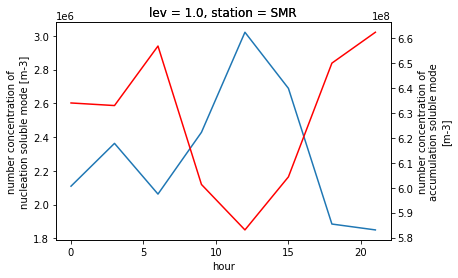

In [37]:
f, ax = plt.subplots()
_ds['nconcNS'].groupby(_ds['hour']).mean().isel(lev= 0).plot(ax = ax)
ax2 = ax.twinx()
_ds['nconcAS'].groupby(_ds['hour']).mean().isel(lev= 0).plot(ax = ax2, c='r')

### NORESM

#### Settings:

In [38]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [39]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [40]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

#### Cases:

In [41]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [42]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

#### Variables

In [43]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
       'PS',
       'NNAT_0',
       #'NCONC00',
       'NCONC02',
       'NCONC03',
       'NCONC04',
       'NCONC05',
       'NCONC06',
       'NCONC07',
       'NCONC08',
       'NCONC09',
       'NCONC10',
       'NCONC11',
       'NCONC12',
       'NCONC13',
       'NCONC14',
       'NMR01',
       #'NMR00',
       #'SIGMA00',
       'SIGMA01',
       'NMR02',
       'SIGMA02',
       'NMR03',
       'SIGMA03',
       'NMR04',
       'SIGMA04',
       'NMR05',
       'SIGMA05',
       'NMR06',
       'SIGMA06',
       'NMR07',
       'SIGMA07',
       'NMR08',
       'SIGMA08',
       'NMR09',
       'SIGMA09',
       'NMR10',
       'SIGMA10',
       'NMR11',
       'SIGMA11',
       'NMR12',
       'SIGMA12',
       'NMR13',
       'SIGMA13',
       'NMR14',
       'SIGMA14',
       #'hyam','hybm',
       #'hyai','hybi',
       'N500',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

#### Read in NorESM

In [44]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Ou

In [45]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_s

In [46]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

{'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

2023-03-08 17:16:02,474 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SIGMA13_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/NMR14_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SIGMA14_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SOA_NA_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x

In [47]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2023-03-08 17:16:06,689 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

{'history_field': '.h1.', 'use_pressure_coords': False}
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

In [48]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [49]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [50]:
dic_ds = {case_mod: ds_comb}

In [51]:
dic_mod_ca['NorESM'] = dic_ds.copy()

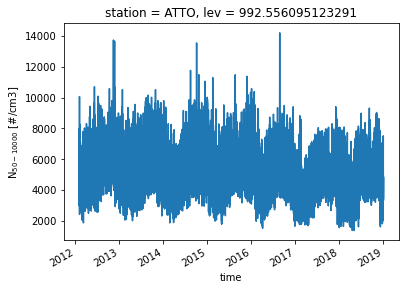

In [52]:
ds_comb['N50'].sel(station='ATTO').isel(lev=-1).plot()

In [53]:
vrlis = [f'NCONC{i:02}' for i in range(1,15)] +[f'NMR{i:02}' for i in range(1,15)] + [f'SIGMA{i:02}' for i in range(1,15)] 

In [54]:
from dask.diagnostics import ProgressBar

## SELECT STATION:


In [55]:
for mod in dic_mod_ca.keys():
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station=select_station)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
EC-Earth
UKESM
NorESM


KeyboardInterrupt: 

## Select level: 

In [ ]:
for mod in dic_mod_ca.keys():
    if mod in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=model_lev_i)
        print(dic_mod_ca[mod][ca].lev)
        dic_mod_ca[mod][ca].load()

In [ ]:
for mod in dic_mod_ca.keys():
    if mod not in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    lev_i_tm5 = -model_lev_i-1
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=lev_i_tm5)
        if mod=='EC-Earth':
            dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev_ifs=model_lev_i)
        dic_mod_ca[mod][ca].load()




TM5 has model levels going from the ground and up, IFS from the top and down.

## Adjust ECHAM-SALSA

In [ ]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [ ]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [ ]:
import datetime

### Fix echam time

In [ ]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

In [ ]:
dic_mod_ca['ECHAM-SALSA'][case_name_echam]

### Run ds2df_echam

In [ ]:
from bs_fdbck.util.BSOA_datamanip import pressure_default, standard_air_density,R

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], 
                        take_daily_median=False, 
                        air_density=standard_air_density,
                        model_lev_i =model_lev_i)
df.index = df.reset_index()['time'].apply(fix_echam_time)
df

In [ ]:
df['N100'].plot()

### Save result

In [ ]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

## Adjust EC-Earth:

In [ ]:
ds_ec_earth = dic_mod_ca['EC-Earth'][case_name_ec_earth]

#### Check all data there:

In [ ]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import rad_vars, num_vars

In [ ]:
for n in num_vars:
    ds_ec_earth[n].plot()
    plt.show()

In [ ]:
for n in rad_vars:
    ds_ec_earth[n].plot()
    plt.show()

In [ ]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import ds2df_ec_earth

In [ ]:

df, df_sm = ds2df_ec_earth(ds_ec_earth,
                        take_daily_median=False,
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

### Assuming standard pressure for EC-Earth (since we don't have this and the effect is marginal)

Converting by:

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb}
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [ ]:
from bs_fdbck.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [ ]:
df['T_C']

In [ ]:
df['density'] = 1e5/(R*(df['T_C']+273.15))

In [ ]:
df['density'].plot(marker='.')

In [ ]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [ ]:
vl = ['OA','N100','N200','N50','N500']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

In [ ]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

In [ ]:
df['N50_STP'].plot.hist(alpha=0.6, bins=100, density=True)#.columns#['Temperature'].plot()
df['N50_amb'].plot.hist(alpha=0.6, bins=100, density=True)#.columns#['Temperature'].plot()

### Save result

In [ ]:


_di = {case_name_ec_earth:df}
_dism = {case_name_ec_earth:df_sm}

dic_df_mod_case['EC-Earth']= _di.copy()
dic_dfsm_mod_case['EC-Earth'] = _dism.copy()

## Adjust UKESM:

In [ ]:
ds_ukesm = dic_mod_ca['UKESM'][case_name_ukesm]

#### Check all data there:

In [ ]:
from bs_fdbck.util.BSOA_datamanip.ukesm import diam_vars, num_vars

In [ ]:
for n in num_vars:
    ds_ukesm[n].plot()
    plt.show()

In [ ]:
for n in diam_vars:
    ds_ukesm[n].plot()
    plt.show()

In [ ]:
from bs_fdbck.util.BSOA_datamanip.ukesm import ds2df_ukesm

In [ ]:

df, df_sm = ds2df_ukesm(ds_ukesm,
                        take_daily_median=False,
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

### Assuming standard pressure for UKESM (since we don't have this and the effect is marginal)

Converting by:

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb}
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [ ]:
from bs_fdbck.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [ ]:
df['T_C']

In [ ]:
df['density'] = 1e5/(R*(df['T_C']+273.15))

In [ ]:
df['density'].plot(marker='.')

In [ ]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [ ]:
vl = ['OA','N100','N200','N50','N500']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

In [ ]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

In [ ]:
df['N50_STP'].plot()#.columns#['Temperature'].plot()

In [ ]:
df['N50_amb'].plot.hist(bins=100, alpha=.5)#.columns#['Temperature'].plot()
df['N50_STP'].plot.hist(bins=100, alpha=.5)#.columns#['Temperature'].plot()

### Save result

In [ ]:


_di = {case_name_ukesm:df}
_dism = {case_name_ukesm:df_sm}

dic_df_mod_case['UKESM']= _di.copy()
dic_dfsm_mod_case['UKESM'] = _dism.copy()

## Adjust NorESM

In [ ]:
ds_noresm = dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']

In [ ]:
ds['PS'].sel(station=select_station).plot.hist(bins=100);

In [ ]:
ds_noresm['SOA_A1'].plot.hist(bins=100);

In [ ]:
air_dens = ds_noresm['PS']/(R*ds_noresm['T'])

### Run ds2df NorESM

In [ ]:
dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], 
                                            model_lev_i=model_lev_i, 
                                            air_density=standard_air_density,
                                            select_hours_clouds=False,
                                            mask_cloud_values = False,
#                   from_hour=8,
#                   to_hour=14,
#                   varl_cl=None,
#                   varl_st = None,
          mask_summer = False,
                                            return_summer_median=False, 
                                            take_daily_median=False
                                )


dic_df_mod_case['NorESM'] = dic_df.copy()

### NorESM needs correcting only for number concentrations

Converting by:

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb}
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [ ]:
from bs_fdbck.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [ ]:
df = dic_df_mod_case['NorESM'][case_noresm]

In [ ]:
if 'OA' in df.columns:
    df = df.rename({'OA':'OA_STP'}, axis=1)

In [ ]:
pressure = df['PS']
temperature = df['T_C']

In [ ]:
df['density'] = pressure/(R*(temperature+273.15))

In [ ]:
df['density'].plot(marker='.')

In [ ]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [ ]:
vl = ['N100','N200','N50','N500']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

In [ ]:
dic_df_mod_case['NorESM'][case_noresm] = df

In [ ]:
dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']['OA'].plot()

In [ ]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['N50'].plot()

In [ ]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']#['50-500'].plot()

In [ ]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['N50'].plot()

## SHIFT TIME to ATTO which is  european winter time EET UTC-4

In [ ]:
import datetime

In [ ]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind - datetime.timedelta(hours=4)

In [ ]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

### Compute N50-500 etc.

In [ ]:
for mo in models:
    print(mo)
    for ca in di_mod2cases[mo]:
        df = dic_df_mod_case[mo][ca]
        
        for v in ['N50', 'N100', 'N200']:
            _v2 = f'{v}_STP'
            _v2_minus = f'N500_STP'
            if v in df.columns:
                df[v + '-500'] = df[v] - df['N500']
                print(f'computing {v}-500')
            if _v2 in df.columns:
                df[f'{v}-500_STP'] = df[_v2]-df[_v2_minus]
                print(f'computing {v}-500_STP')
                
        dic_df_mod_case[mo][ca] = df
            
        print(v)

#### NorESM

In [ ]:
rn_dict_echam

In [ ]:
df = dic_df_mod_case['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']
#df = dic_df_mod_case['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp']
df['N50_STP'].plot()

In [ ]:
df['T']

## Write to file:

In [ ]:
for mod in models:
    print(mod)
    dic_df_mod_case[mod]
    for ca in dic_df_mod_case[mod].keys():
        print(mod, ca)
        if model_lev_i !=-2:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        else:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_mod_case[mod][ca].to_csv(fn_out)

In [ ]:
dic_df_mod_case[mod][ca]['OA_STP']#.plot()

In [ ]:
pd.read_csv('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-1.csv')